## <p style="text-align:center" color="red"><span style="color:red">Sentiment Analysis model for the Wolof language</span></p>


<table align="center"> 
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/labrijisaad/Sentiment-Analysis-model-for-the-Wolof-language"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

- 🎯 In this notebook, I tried to create a **`sentiment analysis model for Wolof language`**. 
- 🤔 To do this, I gathered data already labeled in different datasets extracted from different sources (Quran, Bible, proverbs, twitter): The notebooks I used for web scraping can be found in my [github repository](https://github.com/labrijisaad)).
- ⏭ Next, i used some of scikit learn's most well-known classification models with **`TF-IDF Vectorizer`** to train the final model:
> - **`Logistic Regression`**,
> - **`Bernoulli Naive Bayes`**,                                                
> - **`Decision Tree`**,
> - **`Support vector machine`**. 
- 📫 Feel free to contact me if anything is wrong or if anything needs to be changed 😎!  **labrijisaad@gmail.com**

# `Importing the necessary dependencies` 

In [1]:
%%capture

# utilities 
import re # regular expression library
import numpy as np
import pandas as pd
import random as rd
import codecs
import string
string.punctuation

# plotting 
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk 
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords

# sklearn :
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


# time library :
import time

# tqdm
from tqdm import tqdm # create progress bars

# yaspin
import time
from yaspin import yaspin
from yaspin.spinners import Spinners


# nlu
import nlu

#  `Reading and Loading the Dataset` 
> 🏃 To train the sentiment analysis model, I gathered already labeled datasets from different sources:

###  `Bible Data-set` 

In [2]:
df1 = pd.read_csv('..\\Bible wolof-anglais + sentiment\\wolofBible.csv')
df1

,idx,wolof,Eng,res,label,score
0,1:1,"Yaw Teyofil, téere bu jëkk, ba ma bindoon, ëm...","I have given an earlier account, O Theophilus,...","[{'label': 'POSITIVE', 'score': 0.994795739650...",POSITIVE,0.994796
1,1:2,"ba ci bés, ba ko Yàlla yéege ci asamaan. Lu k...",Till the day when he was taken up to heaven af...,"[{'label': 'POSITIVE', 'score': 0.993048787117...",POSITIVE,0.993049
2,1:3,"Gannaaw ay coonoom, ñëw na ci ñoom, di leen w...",And to whom he gave clear and certain signs th...,"[{'label': 'POSITIVE', 'score': 0.997827827930...",POSITIVE,0.997828
3,1:4,"Am bés muy lekk ak ñoom, mu sant leen ne: «Bu...","And when they were all together, with him, he ...","[{'label': 'POSITIVE', 'score': 0.996940612792...",POSITIVE,0.996941
4,1:5,"Ndaxte Yaxya daa na sóob nit ñi ci ndox, waay...","For the baptism of John was with water, but yo...","[{'label': 'POSITIVE', 'score': 0.990428090095...",POSITIVE,0.990428
...,...,...,...,...,...,...
7913,3:11,xam ne nit ku ñaaw xel la te ay bàkkaaram fés...,"Clearly he is in error and a sinner, being sel...","[{'label': 'NEGATIVE', 'score': 0.999426603317...",NEGATIVE,0.999427
7914,3:12,"Bu ma la yónnee Artemas walla Tisig, gaawantu...","When I send Artemas or Tychicus to you, do you...","[{'label': 'POSITIVE', 'score': 0.997551500797...",POSITIVE,0.997552
7915,3:13,"Naka Senas àttekat bi nag ak Apolos, waajal l...","Send Zenas, the man of law, and Apollos on the...","[{'label': 'POSITIVE', 'score': 0.997164785861...",POSITIVE,0.997165
7916,3:14,"Na sunuy bokk it takku ci jëf yu rafet, ba ma...",And let our people go on with good works for n...,"[{'label': 'POSITIVE', 'score': 0.998484313488...",POSITIVE,0.998484


In [3]:
df1.drop(columns=["res", "Eng", "score","idx"], inplace = True)
df1

,wolof,label
0,"Yaw Teyofil, téere bu jëkk, ba ma bindoon, ëm...",POSITIVE
1,"ba ci bés, ba ko Yàlla yéege ci asamaan. Lu k...",POSITIVE
2,"Gannaaw ay coonoom, ñëw na ci ñoom, di leen w...",POSITIVE
3,"Am bés muy lekk ak ñoom, mu sant leen ne: «Bu...",POSITIVE
4,"Ndaxte Yaxya daa na sóob nit ñi ci ndox, waay...",POSITIVE
...,...,...
7913,xam ne nit ku ñaaw xel la te ay bàkkaaram fés...,NEGATIVE
7914,"Bu ma la yónnee Artemas walla Tisig, gaawantu...",POSITIVE
7915,"Naka Senas àttekat bi nag ak Apolos, waajal l...",POSITIVE
7916,"Na sunuy bokk it takku ci jëf yu rafet, ba ma...",POSITIVE


###  `Proverbes Data-set` 

In [4]:
df2 = pd.read_csv('..\\wolof_french_translatedEnglish proverbs + sentiment_with_CamemBERT\\wolof_french_translatedEnglish_proverbs + sentiment_with_CamemBERT.csv')
df2

,wolof_proverbs,french_proverbs,english_proverbs (translated),sentiment_with_CamemBERT-french-model
0,hasavân ây nà ci soj,Le basilic est mauvais pour le rhume,Basil is bad for colds,NEGATIVE
1,béjin du jekà bopâ sah,La corne ne pousse pas avant la tête,The horn does not push before the head,NEGATIVE
2,lu bérèf fètà-fèta dal ci anda’m,"Le pépin a beau sautiller, il retombe toujour...","The glitch may hop, he always falls on his com...",NEGATIVE
3,bet du jôy lul lu mu ham,L’œil ne pleure que celui qu’il connaît,The eye only cries the one he knows,POSITIVE
4,bèy bi ñu yapà vês nà mbus,Il est trop tard de faire un mbus avec la pea...,It is too late to make a mbus with the skin of...,NEGATIVE
...,...,...,...,...
438,kham sœ bop’-œ-gœn kou lœ ko wœkh,Se connaître soi-même vaut mieux que de l’app...,Getting to know yourself is better than learni...,NEGATIVE
439,kou khœsté wœkhè-f-ngœ lô d’on,"S’injurier, c’est faire connaître ce que l’on...",Increase is to make known what we are,NEGATIVE
440,yakœmt’-èk gâwœntou bou gnou dhiour-é dome ré...,L’empressement et la précipitation enfantent ...,Eagerness and precipitation gives birth to rep...,NEGATIVE
441,mbame-mou bou waikh’-é matœ def-n’œ khèkh’-ou...,L’âne qui mord après une ruade fait le métier...,The donkey that bites after a ruade makes the ...,NEGATIVE


In [5]:
df2.rename(columns = {'wolof_proverbs':'wolof', 'sentiment_with_CamemBERT-french-model':'label'}, inplace = True)
df2.drop(columns=['french_proverbs', "english_proverbs (translated)"], inplace = True)
df2

,wolof,label
0,hasavân ây nà ci soj,NEGATIVE
1,béjin du jekà bopâ sah,NEGATIVE
2,lu bérèf fètà-fèta dal ci anda’m,NEGATIVE
3,bet du jôy lul lu mu ham,POSITIVE
4,bèy bi ñu yapà vês nà mbus,NEGATIVE
...,...,...
438,kham sœ bop’-œ-gœn kou lœ ko wœkh,NEGATIVE
439,kou khœsté wœkhè-f-ngœ lô d’on,NEGATIVE
440,yakœmt’-èk gâwœntou bou gnou dhiour-é dome ré...,NEGATIVE
441,mbame-mou bou waikh’-é matœ def-n’œ khèkh’-ou...,NEGATIVE


###  `Koran Data-set` 

In [6]:
df3_french_sentiment_analysis = pd.read_csv ("C:\\Users\\SAAD\Desktop\\Internship\\coran wolof-francais-anglais + sentiment\\Coran data-set + sentiment\\Coran_french-wolof+french_sentiment_analysis.csv")
df3_french_sentiment_analysis

,index sourat,index verse,name sourat in french,name sourat in wolof,verse in french,verse in wolof,sentiment with CamemBERT-french model
0,1,1,al fatiha,ubbiku ga saar wu jëkk wi,au nom d allah le tout miséricordieux le très...,"Ci turu Yàlla, miy Yërëmaakoon , di Jaglewaak...",POSITIVE
1,1,2,al fatiha,ubbiku ga saar wu jëkk wi,louange à allah seigneur de l univers,"Xeeti cant yépp ñeel na Yàlla, miy Boroom àdd...",POSITIVE
2,1,3,al fatiha,ubbiku ga saar wu jëkk wi,le tout miséricordieux le très miséricordieux,"Yërëmaakoon bi, Jaglewaakoon bi,",POSITIVE
3,1,4,al fatiha,ubbiku ga saar wu jëkk wi,maître du jour de la rétribution,"Di Buur, di Boroom Bis-pénc ba.",POSITIVE
4,1,5,al fatiha,ubbiku ga saar wu jëkk wi,c est toi seul que nous adorons et c est toi ...,"Yaw doŋŋ la nuy jaamu, te ci Yaw doŋŋ doŋŋ la ...",POSITIVE
...,...,...,...,...,...,...,...
6231,114,2,an nas,nit ñi,le souverain des hommes,"Kiy Buurub nit ñi,",POSITIVE
6232,114,3,an nas,nit ñi,dieu des hommes,"Di Yàlla nit ñi,",POSITIVE
6233,114,4,an nas,nit ñi,contre le mal du mauvais conseiller furtif,"ci ayu jax-jaxali, Saytaane,",POSITIVE
6234,114,5,an nas,nit ñi,qui souffle le mal dans les poitrines des hom...,"kiy jax-jaxal ci biir dënni nit ñi,",POSITIVE


In [7]:
df3_french_sentiment_analysis.drop(columns=["index sourat", "name sourat in wolof", "index verse","name sourat in french","verse in french"], inplace = True)
df3_french_sentiment_analysis.rename(columns = {'verse in wolof':'wolof', 'sentiment with CamemBERT-french model':'label'}, inplace = True)
df3_french_sentiment_analysis

,wolof,label
0,"Ci turu Yàlla, miy Yërëmaakoon , di Jaglewaak...",POSITIVE
1,"Xeeti cant yépp ñeel na Yàlla, miy Boroom àdd...",POSITIVE
2,"Yërëmaakoon bi, Jaglewaakoon bi,",POSITIVE
3,"Di Buur, di Boroom Bis-pénc ba.",POSITIVE
4,"Yaw doŋŋ la nuy jaamu, te ci Yaw doŋŋ doŋŋ la ...",POSITIVE
...,...,...
6231,"Kiy Buurub nit ñi,",POSITIVE
6232,"Di Yàlla nit ñi,",POSITIVE
6233,"ci ayu jax-jaxali, Saytaane,",POSITIVE
6234,"kiy jax-jaxal ci biir dënni nit ñi,",POSITIVE


In [8]:
df3_english_sentiment_analysis = pd.read_csv ("C:\\Users\\SAAD\Desktop\\Internship\\coran wolof-francais-anglais + sentiment\\Coran data-set + sentiment\\Coran_english-wolof+english_sentiment_analysis.csv")
df3_english_sentiment_analysis

,index sourat,index verse,name sourat in arabic,name sourat in english,name sourat in wolof,verse in english,verse in wolof,sentiment with vaderSentiment-english model
0,1,1,الفاتحة,al fatihah,ubbiku ga saar wu jëkk wi,in the name of god the gracious the merciful,"Ci turu Yàlla, miy Yërëmaakoon , di Jaglewaak...",POSITIVE
1,1,2,الفاتحة,al fatihah,ubbiku ga saar wu jëkk wi,praise be to god lord of the worlds,"Xeeti cant yépp ñeel na Yàlla, miy Boroom àdd...",POSITIVE
2,1,3,الفاتحة,al fatihah,ubbiku ga saar wu jëkk wi,the most gracious the most merciful,"Yërëmaakoon bi, Jaglewaakoon bi,",POSITIVE
3,1,4,الفاتحة,al fatihah,ubbiku ga saar wu jëkk wi,master of the day of judgment,"Di Buur, di Boroom Bis-pénc ba.",POSITIVE
4,1,5,الفاتحة,al fatihah,ubbiku ga saar wu jëkk wi,it is you we worship and upon you we call for...,"Yaw doŋŋ la nuy jaamu, te ci Yaw doŋŋ doŋŋ la ...",POSITIVE
...,...,...,...,...,...,...,...,...
6231,114,2,الـناس,an nas,nit ñi,the king of mankind,"Kiy Buurub nit ñi,",POSITIVE
6232,114,3,الـناس,an nas,nit ñi,the god of mankind,"Di Yàlla nit ñi,",POSITIVE
6233,114,4,الـناس,an nas,nit ñi,from the evil of the sneaky whisperer,"ci ayu jax-jaxali, Saytaane,",NEGATIVE
6234,114,5,الـناس,an nas,nit ñi,who whispers into the hearts of people,"kiy jax-jaxal ci biir dënni nit ñi,",POSITIVE


In [9]:
df3_english_sentiment_analysis.drop(columns=["index sourat", "name sourat in wolof", "index verse","name sourat in english","verse in english", "name sourat in arabic"], inplace = True)
df3_english_sentiment_analysis.rename(columns = {'verse in wolof':'wolof', 'sentiment with vaderSentiment-english model':'label'}, inplace = True)
df3_english_sentiment_analysis

,wolof,label
0,"Ci turu Yàlla, miy Yërëmaakoon , di Jaglewaak...",POSITIVE
1,"Xeeti cant yépp ñeel na Yàlla, miy Boroom àdd...",POSITIVE
2,"Yërëmaakoon bi, Jaglewaakoon bi,",POSITIVE
3,"Di Buur, di Boroom Bis-pénc ba.",POSITIVE
4,"Yaw doŋŋ la nuy jaamu, te ci Yaw doŋŋ doŋŋ la ...",POSITIVE
...,...,...
6231,"Kiy Buurub nit ñi,",POSITIVE
6232,"Di Yàlla nit ñi,",POSITIVE
6233,"ci ayu jax-jaxali, Saytaane,",NEGATIVE
6234,"kiy jax-jaxal ci biir dënni nit ñi,",POSITIVE


###  `Negative tweets Data-set` 
> After extracting the data from Twitter using the Twitter API, I labled the sentiment of the dataset based on the sentiment of the emojis found in the tweets.
> - 🔔 I did this to have a fair distribution between negative and positive sentiments in the final dataset (you can visualize that in the section **`Data Visualization of "label" variable`**)

In [10]:
df4 = pd.read_csv ("..\\Extracting the negative tweets from JSON file\\negative_wolof_tweets + sentiment_from_emoji.csv")
df4

,wolof tweet,sentiment from emojis,language
0,mangui melni kou am 10ans ak coupe bi,NEGATIVE,wolof
1,__eloi boy boymais fo rerr domou ndey,NEGATIVE,wolof
2,kel tdc ce pierre mènes,NEGATIVE,wolof
3,do ndy dem yow,NEGATIVE,wolof
4,li meu méti rekk moy né genrou boy yooyou degn...,NEGATIVE,wolof
...,...,...,...
5128,_moustaph keneu khamoul flemme,NEGATIVE,wolof
5129,___nafissa mako dakk yow ladjo seme numero di ...,NEGATIVE,wolof
5130,_bachir mane deh damay setan bay beu leuz,NEGATIVE,wolof
5131,ins bi key,NEGATIVE,wolof


In [11]:
df4.drop(columns=["language"], inplace = True)
df4.rename(columns = {'wolof tweet':'wolof', 'sentiment from emojis':'label'}, inplace = True)
df4

,wolof,label
0,mangui melni kou am 10ans ak coupe bi,NEGATIVE
1,__eloi boy boymais fo rerr domou ndey,NEGATIVE
2,kel tdc ce pierre mènes,NEGATIVE
3,do ndy dem yow,NEGATIVE
4,li meu méti rekk moy né genrou boy yooyou degn...,NEGATIVE
...,...,...
5128,_moustaph keneu khamoul flemme,NEGATIVE
5129,___nafissa mako dakk yow ladjo seme numero di ...,NEGATIVE
5130,_bachir mane deh damay setan bay beu leuz,NEGATIVE
5131,ins bi key,NEGATIVE


###  `Total Data-set` 
> After merging the four dataframes, we have a final dataframe ready to be wrangled 😃

In [12]:
df = pd.concat([df1, df2, df3_english_sentiment_analysis, df4])
df.to_csv("Total Data-set.csv", encoding="utf-8-sig", index=False)

# Display of the first 5 lines of our dataset :
df

,wolof,label
0,"Yaw Teyofil, téere bu jëkk, ba ma bindoon, ëm...",POSITIVE
1,"ba ci bés, ba ko Yàlla yéege ci asamaan. Lu k...",POSITIVE
2,"Gannaaw ay coonoom, ñëw na ci ñoom, di leen w...",POSITIVE
3,"Am bés muy lekk ak ñoom, mu sant leen ne: «Bu...",POSITIVE
4,"Ndaxte Yaxya daa na sóob nit ñi ci ndox, waay...",POSITIVE
...,...,...
5128,_moustaph keneu khamoul flemme,NEGATIVE
5129,___nafissa mako dakk yow ladjo seme numero di ...,NEGATIVE
5130,_bachir mane deh damay setan bay beu leuz,NEGATIVE
5131,ins bi key,NEGATIVE


In [13]:
# Display the column names of our dataset :
df.columns.values.tolist()

['wolof', 'label']

In [14]:
# Display the number of records is our dataset :
print('length of data is', len(df))

length of data is 19730


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19730 entries, 0 to 5132
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   wolof   19730 non-null  object
 1   label   19730 non-null  object
dtypes: object(2)
memory usage: 462.4+ KB


# `Data Visualization of "label" variable` 

In [16]:
df.groupby('label').count()

,wolof
label,
NEGATIVE,10305
POSITIVE,9425


In [17]:
total_negative = df.groupby('label')["wolof"].count().NEGATIVE
total_positive = df.groupby('label')["wolof"].count().POSITIVE
negative_percentage = total_negative/(total_positive+total_negative)*100

print("The percentage of negative text in our dataframe is {:.2f} %".format(negative_percentage))

The percentage of negative text in our dataframe is 52.23 %


- Since the **`label`** column only contains **NEGATIVE** or **POSITIVE**, using the **`.groupby()`** function will result in two categories: **NEGATIVE** and **POSITIVE**

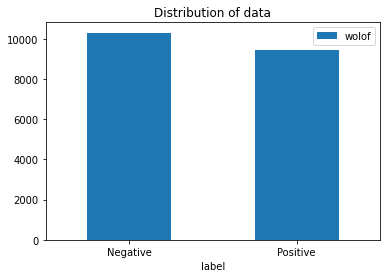

In [18]:
# Plotting the distribution for dataset :
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=True)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)
plt.show()

- 💡 As shown in the figure below, there is no equiproportion between positively and negatively labeled data. which can generate a quite significant difference between the F1-scores of the positively labeled data, and the others negatively labeled.

#  `Data Preprocessing`
### `Processing the target column`

In [19]:
%%capture

# Selecting the text and Target column for our further analysis :
data = df[["wolof", "label"]]
data.rename(columns = {'wolof': 'wolof_text', 
                       'label': 'target'}, inplace = True)

# Replacing the values to ease understanding :
data['target'] = data['target'].replace("NEGATIVE", -1)
data['target'] = data['target'].replace("POSITIVE", 1)

In [20]:
data.target.value_counts() 

-1    10305
 1     9425
Name: target, dtype: int64

In [21]:
data.dtypes

wolof_text    object
target         int64
dtype: object

In [22]:
# Print unique values of target variable :
data['target'].unique()

array([ 1, -1], dtype=int64)

In [23]:
# Separating positive and negative tweets :
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == -1]

 - The **`data_pos`** variable contains the **`english_text`** and the **`target = 1`** columns. 
 - The **`data_neg`** variable contains the **`english_text`** and the **`target = -1`** columns. 

In [24]:
# Combining positive and negative tweets :
dataset = pd.concat([data_pos, data_neg])

In [25]:
dataset

,wolof_text,target
0,"Yaw Teyofil, téere bu jëkk, ba ma bindoon, ëm...",1
1,"ba ci bés, ba ko Yàlla yéege ci asamaan. Lu k...",1
2,"Gannaaw ay coonoom, ñëw na ci ñoom, di leen w...",1
3,"Am bés muy lekk ak ñoom, mu sant leen ne: «Bu...",1
4,"Ndaxte Yaxya daa na sóob nit ñi ci ndox, waay...",1
...,...,...
5128,_moustaph keneu khamoul flemme,-1
5129,___nafissa mako dakk yow ladjo seme numero di ...,-1
5130,_bachir mane deh damay setan bay beu leuz,-1
5131,ins bi key,-1


In [26]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size' :14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size' :14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size' :18}, pad = 20)

## `Model Training on wolof` :

### `Processing the wolof text`

In [27]:
%%capture

# lower()
dataset['wolof_text_processed'] = dataset['wolof_text'].str.lower() 

# cleaning numbers :
def cleaning_numbers(data): # Cleaning and removing Numeric numbers :
    return re.sub('[0-9]+', '', data)

dataset['wolof_text_processed'] = dataset['wolof_text_processed'].apply(lambda x: cleaning_numbers(x))

# remove ponctuation :
def remove_ponctuation(text):
    for ele in text:
        if ele in '''!()-[]{}»«;:'"\,<>./?@#$%^&*_~''':
            text = text.replace(ele, "")
    return text

dataset['wolof_text_processed'] = dataset['wolof_text_processed'].apply(lambda x: remove_ponctuation(x))

# remove excess whitespace 
dataset['wolof_text_processed'] = dataset['wolof_text_processed'].apply(lambda text: re.sub("\s\s+", " ", text))

### `wolof stop-words`
> ⚠️ I have already written a script of the most important and frequent stop words in Wolof (stop words in Wolof are indicated in "Entrée [32]"

In [28]:
df = pd.read_csv("../wolof-francais dictionnaire/wolof-francais dictionary.csv", encoding='utf-8')
df = df.where(pd.notnull(df), None)
df.sample(5)

,wolof,trad_francais_0,trad_francais_1
2923,war,devoir,None
1238,dur,jafe,None
542,këf,chose,None
2819,saxal,planter,None
2834,yéem,reste,None


In [29]:
list_dictionary_wolof_french = df.to_dict(orient='records')
dictionary_wolof_french = {}
french_list = []

for dictionary in list_dictionary_wolof_french:
    if dictionary["trad_francais_0"] != None: french_list.append(dictionary["trad_francais_0"].strip())
    if dictionary["trad_francais_1"] != None: french_list.append(dictionary["trad_francais_1"].strip()) 
    if dictionary["wolof"] != None:
        if dictionary["wolof"] in dictionary_wolof_french: dictionary_wolof_french[dictionary["wolof"]] += french_list  
        else: dictionary_wolof_french[dictionary["wolof"]] = french_list
    french_list = []
    
for keys, values in dictionary_wolof_french.items():
    dictionary_wolof_french[keys] = list(dict.fromkeys(dictionary_wolof_french[keys]))

In [30]:
def french_to_wolof(var):
    l = []
    for key, value in dictionary_wolof_french.items():
        if var in value: 
            l.append(key)
    return l

# def wolof_to_french(var):
#     if var in dictionary_wolof_french.keys(): return dictionary_wolof_french[var]
#     else : return []

In [31]:
french_stopwords = [] # This list will store the lines of the file

with codecs.open('../wolof-francais dictionnaire/french_stopwords.txt', encoding='utf-8') as file:
    for word in file:
        word = word.replace("\n"," ") 
        word = word.replace("\r"," ") 
        word = word.replace("\t"," ") 
        word = word.strip()
        french_stopwords.append(word)

len(french_stopwords)

3387

In [32]:
wolof_stopwords = []
for stopword in french_stopwords:
     wolof_stopwords+= french_to_wolof(stopword)

STOPWORDS = set(wolof_stopwords)
print(STOPWORDS)

{'doon', 'be', 'ginnaw', 'yëpp', 'mangi', 'penku', 'lepp', 'kan', 'yow', 'say', 'biir', 'ngir', 'ma', 'lañu', 'bàyyi', 'sa', 'yeen', 'fan', 'juróóm bénneel', 'ñetteel', 'njëkk', 'jëkk', 'fukk ak bénneel', 'juróóm ñaareel', 'kii', 'bala', 'fukk ak ñaar', 'ci kanam', 'mu', 'ñu', 'xalaas', 'wi', 'juróom benn', 'wax', 'ñak', 'rek', 'rafet', 'ñent', 'baax', 'kaw', 'sew', 'fanweer', 'bos', 'ginnaaw', 'man', 'dafa doon', 'juróom ñaar', 'bes bu nekk', 'ci wettu', 'itam', 'fo', 'ban', 'junni', 'foofu', 'ana', 'loolu', 'juróómeel', 'leegi', 'yenn saa', 'kanam', 'suñuy', 'dañu', 'deñu', 'xanaa', 'topp', 'ci', 'waat', 'bi', 'fukk ak benn', 'nekk', 'jërë jëf', 'ci kow', 'kenn', 'fukk', 'ñenteel', 'waa', 'ndaw', 'seeni', 'doole', 'beneen', 'ñent fukk', 'samay', 'doy', 'ngeen', 'sunuy', 'moom', 'si', 'sama', 'diggante', 'tey', 'ni', 'ay', 'tuuti', 'jëk', 'ci suuf', 'waaye', 'kattan', 'ganaaw', 'suñu', 'benn', 'ltam', 'ndayjoor', 'biti', 'dafay', 'boog', 'sunu', 'te', 'kañ', 'ci digente', 'bu jëkk', '

In [33]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dataset['wolof_text_processed'] = dataset['wolof_text_processed'].apply(lambda text: cleaning_stopwords(text))

{'di': 1.0, 'ne': 0.9673340358271865, 'yàlla': 0.7486828240252897, 'na': 0.7207586933614331, 'ca': 0.7191780821917808, 'yi': 0.6454162276080084, 'bu': 0.6037934668071654, 'lu': 0.46206533192834565, 'ya': 0.4130663856691254, 'ku': 0.410958904109589, 'li': 0.36195995785036883, 'ña': 0.3314014752370917, 'ñi': 0.2992623814541623, 'nu': 0.2897787144362487, 'ndax': 0.28714436248682823, 'def': 0.2839831401475237, 'yéen': 0.27344573234984193, 'yu': 0.2613277133825079, 'du': 0.2576396206533193, 'yeesu': 0.2571127502634352, 'boroom': 0.2386722866174921, 'xam': 0.23603793466807166, 'woon': 0.2339304531085353, 'noonu': 0.22391991570073763, 'moo': 0.22128556375131717, 'ngi': 0.20969441517386722, 'daldi': 0.2017913593256059, 'mi': 0.18914646996838777, 'nañu': 0.1880927291886196, 'weddi': 0.18177028451001054, 'ndaxte': 0.17650158061116966, 'fa': 0.17597471022128555, 'naan': 0.1733403582718651, 'dul': 0.16701791359325605, 'mane': 0.1643835616438356, 'yaw': 0.16385669125395153, 'su': 0.1617492096944151

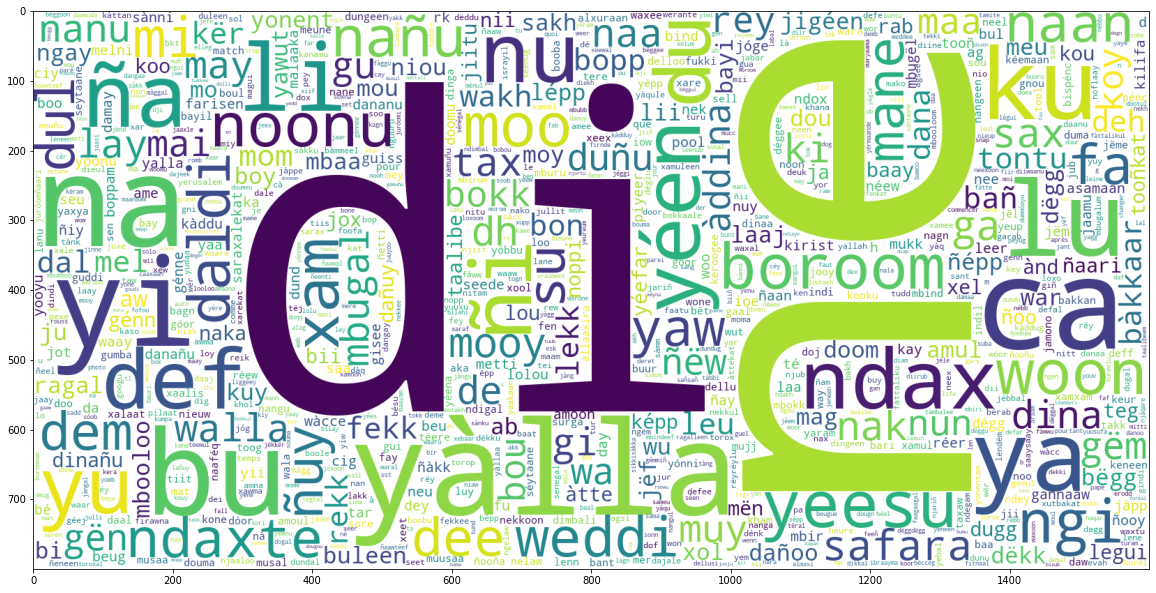

In [37]:
# Plot a cloud of words for negative text :
data_neg = dataset['wolof_text_processed'][len(dataset[dataset["target"] == 1]):] # selecting the negative tweets.
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, background_color="white",
               collocations=False).generate(" ".join(data_neg))
print(wc.words_)
plt.imshow(wc)

{'yàlla': 1.0, 'di': 0.7563223824155046, 'ne': 0.6771448830063814, 'ca': 0.5677144883006382, 'na': 0.5634601748995509, 'bu': 0.43110375797683764, 'lu': 0.35428976601276296, 'ku': 0.33278184826282203, 'yi': 0.32498227369416216, 'nu': 0.32025525880406525, 'boroom': 0.3122193334909005, 'ñi': 0.29378397541952256, 'li': 0.2635310801229024, 'yeesu': 0.2573859607657764, 'xam': 0.24107775939494208, 'yéen': 0.2406050579059324, 'moo': 0.2384779012053888, 'ya': 0.2363507445048452, 'yu': 0.22098794611203026, 'ña': 0.20727960293074923, 'noonu': 0.19688017017253603, 'ndax': 0.19309855826045852, 'ngi': 0.18553533443630346, 'mi': 0.1798629165681872, 'def': 0.17017253604348853, 'gëm': 0.15291893169463483, 'ndaxte': 0.1500827227605767, 'fa': 0.14511935712597496, 'woon': 0.14488300638147011, 'mooy': 0.14370125265894587, 'du': 0.13637437957929568, 'ñuy': 0.13212006617820846, 'daldi': 0.1318837154337036, 'dul': 0.13117466320018908, 'gu': 0.12479319309855826, 'ga': 0.11959347671945167, 'yaw': 0.118411722996

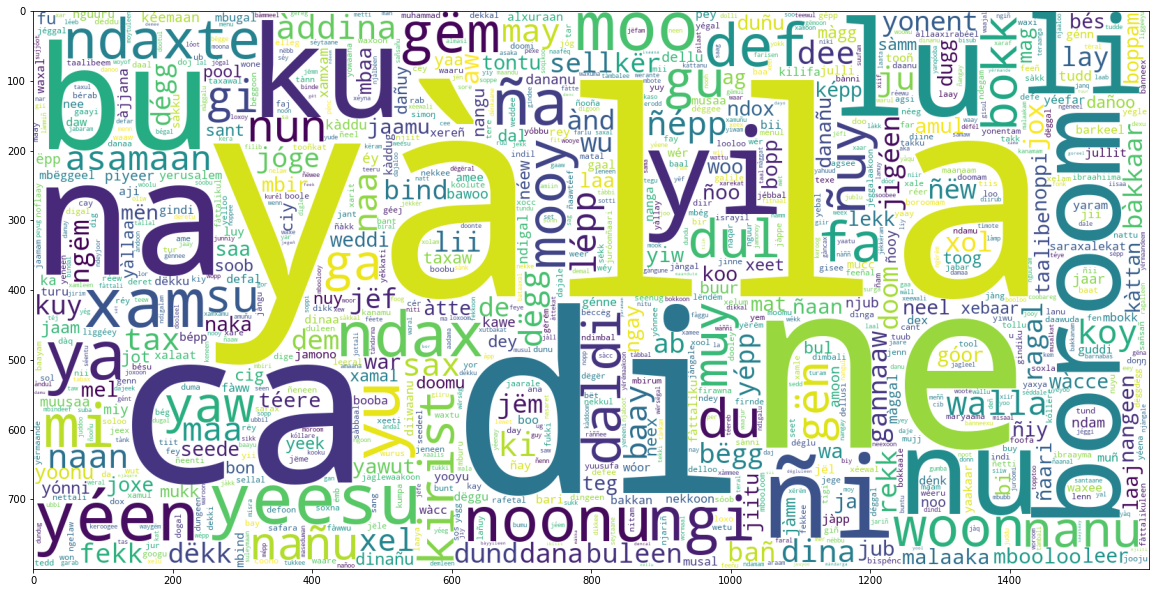

In [38]:
# Plot a cloud of words for positive text :
data_pos = dataset['wolof_text_processed'][:len(dataset[dataset["target"] == 1])]  # selecting the positive tweets.
wc = WordCloud(max_words=1000, width=1600, height=800, background_color="white",
               collocations=False).generate(" ".join(data_pos))
plt.figure(figsize=(20, 20))
print(wc.words_)
plt.imshow(wc)

### `Spliting the dataset ` :

In [39]:
dataset

,wolof_text,target,wolof_text_processed
0,"Yaw Teyofil, téere bu jëkk, ba ma bindoon, ëm...",1,yaw teyofil téere bu bindoon ëmb na lépp li ye...
1,"ba ci bés, ba ko Yàlla yéege ci asamaan. Lu k...",1,bés yàlla yéege asamaan lu jiitu joxoon na ndi...
2,"Gannaaw ay coonoom, ñëw na ci ñoom, di leen w...",1,gannaaw coonoom ñëw na di won firnde yu wér ne...
3,"Am bés muy lekk ak ñoom, mu sant leen ne: «Bu...",1,bés muy lekk sant ne buleen sore yerusalem xaa...
4,"Ndaxte Yaxya daa na sóob nit ñi ci ndox, waay...",1,ndaxte yaxya daa na sóob ñi ndox yéen dees na ...
...,...,...,...
5128,_moustaph keneu khamoul flemme,-1,moustaph keneu khamoul flemme
5129,___nafissa mako dakk yow ladjo seme numero di ...,-1,nafissa mako dakk ladjo seme numero di ladjte ...
5130,_bachir mane deh damay setan bay beu leuz,-1,bachir mane deh damay setan bay beu leuz
5131,ins bi key,-1,ins key


In [40]:
# Separating input feature and label :
X = dataset.wolof_text_processed
y = dataset.target

In [41]:
# Separating the 90% data for training data and 10% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [42]:
%%capture
# Fit the TF-IDF Vectorizer :
# vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000) 
vectoriser = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True,
                             max_features=20000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

In [43]:
# Transform the data using TF-IDF Vectorizer :
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

### `Model : Logistic Regression` :

The execution time of this model is 0.14 seconds

              precision    recall  f1-score   support

          -1       0.82      0.78      0.80       512
           1       0.77      0.82      0.79       475

    accuracy                           0.80       987
   macro avg       0.80      0.80      0.80       987
weighted avg       0.80      0.80      0.80       987



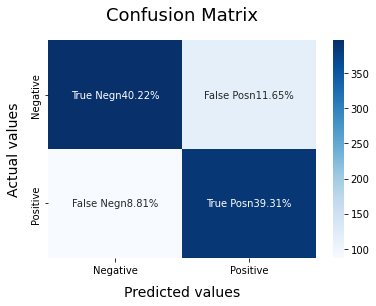

In [44]:
# Model : Logistic Regression.
LRmodel = LogisticRegression(C = 2, max_iter = 500, n_jobs=-10)
start = time.time()
LRmodel.fit(X_train, y_train)
end = time.time()
print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

### `Model : Bernoulli Naive Bayes` :

              precision    recall  f1-score   support

          -1       0.79      0.69      0.74       512
           1       0.71      0.80      0.75       475

    accuracy                           0.74       987
   macro avg       0.75      0.74      0.74       987
weighted avg       0.75      0.74      0.74       987



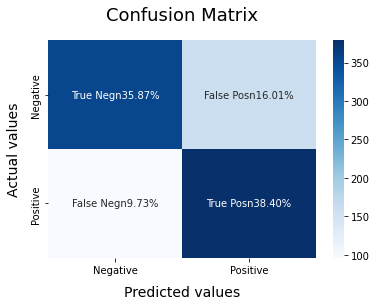

In [45]:
# Model : Bernoulli Naive Bayes.
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

### `Model : Decision Tree` :

              precision    recall  f1-score   support

          -1       0.70      0.71      0.71       512
           1       0.69      0.67      0.68       475

    accuracy                           0.69       987
   macro avg       0.69      0.69      0.69       987
weighted avg       0.69      0.69      0.69       987



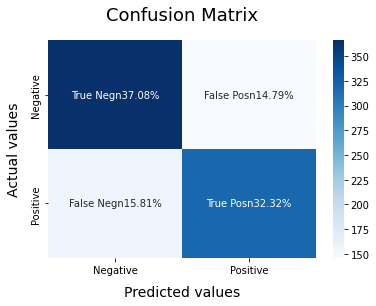

In [46]:
# Model : Decision Tree
clf = DecisionTreeClassifier() ## Create Decision Tree classifer object
clf = clf.fit(X_train, y_train) # Training Decision Tree Classifer
LRmodel.fit(X_train, y_train)
model_Evaluate(clf) ## Predict the response for test dataset
y_pred5 = clf.predict(X_test)

In [47]:
def process_wolof_text(text):
    text = text.lower()
    text = remove_ponctuation(text)
    text = cleaning_numbers(text)
    text = cleaning_stopwords(text)
    text = remove_ponctuation(text)
    text = re.sub("\s\s+", " ", text)
    return text

def predict_wolof_with_logistic_regression(text):
    text = process_wolof_text(text)
    text = [text]
    text = vectoriser.transform(text)
    return "POSITIVE" if (LRmodel.predict(text)[0] == 1) else "NEGATIVE"

def predict_wolof_with_logistic_regression_proba(text):
    text = process_wolof_text(text)
    text = [text]
    text = vectoriser.transform(text)
    return LRmodel.predict_proba(text)[0]

##### Testing the LR model:

In [48]:
text = "Nan lén diapalé"

print("-> text: \t" + text)
print("-> processed text: \t" + process_wolof_text(text) + "\n")
print("-> Result with LR: " + predict_wolof_with_logistic_regression(text) + str(predict_wolof_with_logistic_regression_proba(text)))


-> text: 	Nan lén diapalé
-> processed text: 	nan lén diapalé

-> Result with LR: NEGATIVE[0.95816475 0.04183525]


### `Model : Support vector machine` :

In [52]:
X = dataset.wolof_text_processed
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05) 

In [53]:
# Fit the TF-IDF Vectorizer :
SVM_vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True,
                             max_features=20000)

train_vectors = SVM_vectorizer.fit_transform(X_train)
test_vectors = SVM_vectorizer.transform(X_test)

print('No. of feature_words: ', len(SVM_vectorizer.get_feature_names()))

No. of feature_words:  4284


In [54]:
with yaspin(Spinners.moon) as sp:
    # Perform classification with SVM, kernel=linear
    classifier_linear = svm.SVC(kernel='linear', probability=True)
    t0 = time.time()
    classifier_linear.fit(train_vectors, y_train)
    t1 = time.time()
    prediction_linear = classifier_linear.predict(test_vectors)
    t2 = time.time()

In [55]:
time_linear_train = t1-t0 # The time needed to train our linear classifier
time_linear_predict = t2-t1 # The time needed to predict with our trained linear classifier
print("Training time: {:.2f}s; Prediction time: {:.2f}s".format(time_linear_train, time_linear_predict))

Training time: 122.32s; Prediction time: 0.87s


In [56]:
report = classification_report(y_test, prediction_linear, output_dict=True)

print('Positive precision: {:.2f}%'.format(report['1']["precision"]*100))
print('Negative precision: {:.2f}%'.format(report['-1']["precision"]*100))
print("")
print('Positive: ', report['-1'])
print('Negative: ', report['1'])


Positive precision: 78.57%
Negative precision: 81.37%

Positive:  {'precision': 0.8136645962732919, 'recall': 0.7844311377245509, 'f1-score': 0.7987804878048781, 'support': 501}
Negative:  {'precision': 0.7857142857142857, 'recall': 0.8148148148148148, 'f1-score': 0.7999999999999999, 'support': 486}


In [57]:
def predict_sentiment_svm(text):
    serie = pd.Series(text)
    vector = SVM_vectorizer.transform(serie)
    return str(classifier_linear.predict(vector)[0])

##### Testing the SVM model:

In [58]:
text = "dama la bëgg"

print("-> text: \t" + text)
print("-> processed text: \t" + process_wolof_text(text) + "\n")
print("-> Result with SVM: " + predict_sentiment_svm(process_wolof_text(text)))

-> text: 	dama la bëgg
-> processed text: 	bëgg

-> Result with SVM: 1


# `Saving models` :

> In this part, after choosing the RL and SVM models (they got the best precision and f1 scores), we will export this models and their respective vectorizers with pickle to use them whenever we want 😋

In [59]:
import pickle

pickle.dump(classifier_linear, open('SVM_model.pkl', 'wb'))
pickle.dump(LRmodel, open('LR_model.pkl', 'wb'))

with open('SVM_vectorizer.pk', 'wb') as fin:
    pickle.dump(SVM_vectorizer, fin)
exit()

with open('LR_vectorizer.pk', 'wb') as fin:
    pickle.dump(vectoriser, fin)
exit()

In [60]:
LR_model = pickle.load(open('LR_model.pkl', 'rb'))
SVM_model = pickle.load(open('SVM_model.pkl', 'rb'))

##### Importing newly exported models (NOTE you need to import the vectorizers: SVM_vectorizer, LR_vectorizer as well)

In [61]:
import pickle

LR_model = pickle.load(open('LR_model.pkl', 'rb'))
SVM_model = pickle.load(open('SVM_model.pkl', 'rb'))


def process_wolof_text(text): ## text processing
    text = text.lower()
    text = remove_ponctuation(text)
    text = cleaning_numbers(text)
    text = cleaning_stopwords(text)
    text = remove_ponctuation(text)
    text = re.sub("\s\s+", " ", text)
    return text


def predict_sentiment_svm(text):
    serie = pd.Series(text)
    vector = SVM_vectorizer.transform(serie)
    return str(SVM_model.predict(vector)[0])


def predict_wolof_with_logistic_regression(text):
    text = process_wolof_text(text)
    text = [text]
    text = vectoriser.transform(text)
    return "POSITIVE" if (LR_model.predict(text)[0] == 1) else "NEGATIVE"


text = "dafa xëm"  # Il est évanoui
print(predict_wolof_with_logistic_regression(text))
print(predict_sentiment_svm(text))

NEGATIVE
-1


##### You can also create a python script that handles all the imports and does all the work for you, everything you need to do to use the pickle files with the python script is mentioned in the following cell:

In [10]:
text = "Na nga def ?"
var = !python model/wolof_sentiment.py $text 
print(var[-1])

1


Here is the content of the **`wolof_sentiment.py`** file:
```py
import pickle
import sys
import pandas as pd

text = " ".join(sys.argv) # getting the argument

# Load the model
SVM_model = pickle.load(open('model/svm_model.pkl', 'rb'))
SVM_vectorizer = pickle.load(open("model/SVM_vectorizer.pk", "rb"))

def predict_sentiment_svm(text):
    serie = pd.Series(text)
    vector = SVM_vectorizer.transform(serie)
    return str(SVM_model.predict(vector)[0])

def main():
    print(predict_sentiment_svm(text))

if __name__ == "__main__":
    try:
        main()
    except:
        print("Something went wrong :(")
```

> - 🙌 Notebook made by [@labriji_saad](https://github.com/labrijisaad)
> - 🔗 Linledin [@labriji_saad](https://www.linkedin.com/in/labrijisaad/)